## Credit Card Fraud Detection Project
### To conduct this credit card fraud detection project, I am going to use the CRISP-DM approach:

* Business Understanding
* Data Understanding
* Data Preparation
* Modeling
* Evaluation



### 1. Business Understanding

Credit card fraud is a significant financial risk to both customers and istitutions. In a time when digital payments are increasingly becoming standard, the critical task of protecting against unauthorized access and fraudulent transactions is more important than ever. Effective detection of these activities not only prevents monetary loss but also protects customers and the integrity of the financial system. This project, therefore, is critical for identifying potentially fraudulent transactions, minimizing financial losses, and enhancing customer confidence. 

### 2. Data Understanding
The dataset utilized in this study was sourced from Kaggle: https://www.kaggle.com/datasets/kelvinkelue/credit-card-fraud-prediction/data 

Dataset Overview: The dataset comprises 555,719 instances and 22 attributes, including both categorical and numerical data types. The dataset's completeness and diversity of attributes make it a solid foundation for developing a comprehensive fraud detection model.

* Trans_date_trans_time: Timestamp of the transaction (date and time).
* Cc_num: Unique customer identification number.
* Merchant: The merchant involved in the transaction.
* Category: Transaction type (e.g., personal, childcare).
* Amt: Transaction amount.
* First: Cardholder's first name.
* Last Cardholder's last name.
* Gender: Cardholder's gender.
* Street: Cardholder's street address.
* City: Cardholder's city of residence.
* State: Cardholder's state of residence.
* Zip: Cardholder's zip code.
* Lat:Latitude of cardholder's location.
* Long: Longitude of cardholder's location.
* City_pop: Population of the cardholder's city.
* Job: Cardholder's job title.
* Dob: Cardholder's date of birth.
* Trans_num: Unique transaction identifier.
* Unix_time: Transaction timestamp (Unix format).
* Merch_lat: Merchant's location (latitude).
* Merch_long: Merchant's location (longitude).
* Is_fraud: Fraudulent transaction indicator (1 = fraud, 0 = legitimate). This is the target variable for classification purposes.

In [14]:
import pandas as pd

original_dataset = pd.read_csv("fraud test.csv")
original_dataset.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
5,5,21/06/2020 12:15,3.040770e+13,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,...,42.1939,-76.7361,520,Psychotherapist,13/10/1991,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,0
6,6,21/06/2020 12:15,2.131810e+14,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,...,40.5070,-123.9743,1139,"Therapist, occupational",15/01/1951,17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,0
7,7,21/06/2020 12:15,3.589290e+15,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,...,43.7557,-97.5936,343,"Development worker, international aid",05/03/1972,8be473af4f05fc6146ea55ace73e7ca2,1371816950,44.495498,-97.728453,0
8,8,21/06/2020 12:16,3.596360e+15,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,...,41.0001,-78.2357,3688,Advice worker,27/05/1973,71a1da150d1ce510193d7622e08e784e,1371816970,41.546067,-78.120238,0
9,9,21/06/2020 12:16,3.546900e+15,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,...,31.6591,-96.8094,263,Barrister,30/05/1956,a7915132c7c4240996ba03a47f81e3bd,1371816971,31.782919,-96.366185,0


In [15]:
print(original_dataset.shape)
print(original_dataset.info())

(555719, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   

Our dataset contains no null values.

### 3. Data Preparation
* Data Cleaning
* Handling Missing Values
* Data Transformation
* Feature Selection


In [16]:
#Make a copy of the original dataset to be able to recover it anytime
df = original_dataset
#We can drop this feature, since it has no purpose for our analysis
df.drop(columns='Unnamed: 0', inplace=True)

#Check for data duplicates
print("Duplicated entries number: ", len(df[df.duplicated()]))

df.describe()


Duplicated entries number:  0


,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In our credit card fraud detection analysis, we've chosen not to handle outliers in the dataset. This decision comes from the understanding that outliers, particularly in transaction amounts (`amt`), could represent instances of fraud, which are crucial for training our model effectively.

is_fraud
0    553574
1      2145
Name: count, dtype: int64


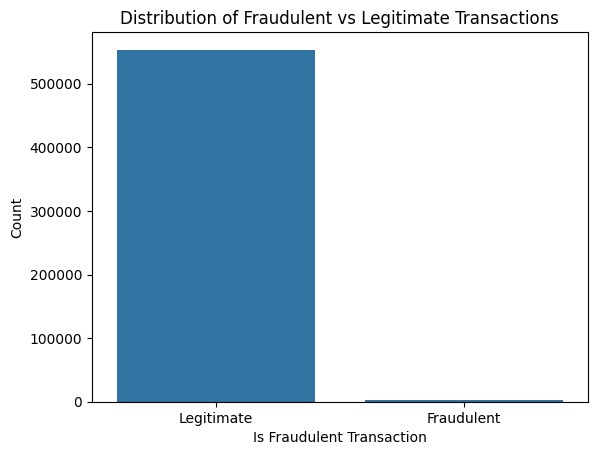

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

#Checking if our target variable is balanced
fraud_value_counts= df['is_fraud'].value_counts()
print(fraud_value_counts)

#Plotting a histogram
sns.barplot(x=fraud_value_counts.index, y=fraud_value_counts.values)

plt.title('Distribution of Fraudulent vs Legitimate Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Total Count')
plt.xticks(ticks=[0, 1], labels=['Legitimate', 'Fraudulent'])
plt.show()
#The result shows that we have an unbalanced target variable